# Modules

## Downloading

In [ ]:
%%capture
!pip install mne

## Additional - Depends On Error

In [2]:
#%%capture
#!curl --remote-name https://raw.githubusercontent.com/mne-tools/mne-python/main/requirements.txt

In [3]:
#%%capture
#!pip install --user -r requirements.txt

In [7]:
#%%capture
#!pip uninstall vtk -y
#!pip install --extra-index-url https://wheels.vtk.org vtk-osmesa

In [8]:
#!export VTK_WITH_OSMESA="True"

# General Attributes

## Libraries

In [1]:
import mne

In [111]:
import os,shutil,torch,json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import matplotlib as mtb

In [3]:
from math import ceil

In [4]:
from warnings import filterwarnings
filterwarnings("ignore",category=RuntimeWarning)
filterwarnings("ignore",category=FutureWarning)
filterwarnings("ignore",category=UserWarning)

## Classes

In [5]:
class CLASSINIT:
  pass
class DOCUMENTATION:
  pass
class PROCESS:
  pass
class ERROR:
  pass
class NULL:
  pass
class DATA:
  pass
class POINT:
  pass

## Constants

In [6]:
outputerrormessage = "[PICKLED - TYPE] Project Based [DENIED]"
montage_type = "biosemi16"

In [7]:
deviceMachine = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(f"ACTIVE ON [{deviceMachine}]")

ACTIVE ON [cuda:0]


## Operations

In [8]:
createDirectory = lambda x: os.mkdir(x) if not os.path.exists(x) else None
deledeDirectoryTree = lambda x: shutil.rmtree(x) if len(os.listdir(x)) >= 2 else None

In [9]:
class ErrorModules(object):
  def __init__(self,errortype:ERROR,errormessage:str)->CLASSINIT:
    self.error = errortype
    self.message = errormessage
  def __str__(self)->str:
    return "Error Module Creation Process"
  def __call__(self)->ERROR:
    return self.error(self.message)
  def __getstate__(self)->ERROR:
    raise TypeError(outputerrormessage)
  def Raise(self)->ERROR:
    raise self.error(self.message)

## Configurations

In [ ]:
%%capture
!pip install ipyevents

In [ ]:
%%capture
!pip install pyvista

In [ ]:
%%capture
!pip install pyvistaqt

In [ ]:
%%capture
mne.viz.set_3d_backend("notebook")

In [ ]:
#%matplotlib inline
#%config InlineBackend.figure_format = "retina"
#plt.style.use("seaborn-v0_8-darkgrid")
#mtb.rcParams["figure.figsize"] = (12,5)
#mtb.rcParams["figure.labelsize"] = "medium"
#mtb.rcParams["font.size"] = 8.0
#mtb.rcParams["lines.linewidth"] = 2
#mtb.rcParams["axes.titlecolor"] = "yellow"
#mtb.rcParams["grid.color"] = "black"

# Electrode Positions - Approaches

## Check Global Montages

In [23]:
default_building_montages = mne.channels.get_builtin_montages(descriptions=True)

In [24]:
for count, (montage_name,montage_description) in enumerate(default_building_montages):
  print(f"{count+1} | {montage_name}: {montage_description}")

1 | standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
2 | standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
3 | standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
4 | standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
5 | standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
6 | standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
7 | biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
8 | biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
9 | biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
10 | biose

## Built Montage - Example

In [25]:
def ShowMontageType(mtype:str=montage_type,stype:str="3d",azimm:int=70,elev:int=15)->PROCESS:
  mt = mne.channels.make_standard_montage(mtype)
  plt.figure(figsize=(6,6))
  mt.plot()
  fgs = mt.plot(kind=stype,show=False)
  fgs = fgs.gca().view_init(azim=azimm,elev=elev)
  plt.tight_layout()
  plt.grid(True)
  plt.show()

<Figure size 600x600 with 0 Axes>

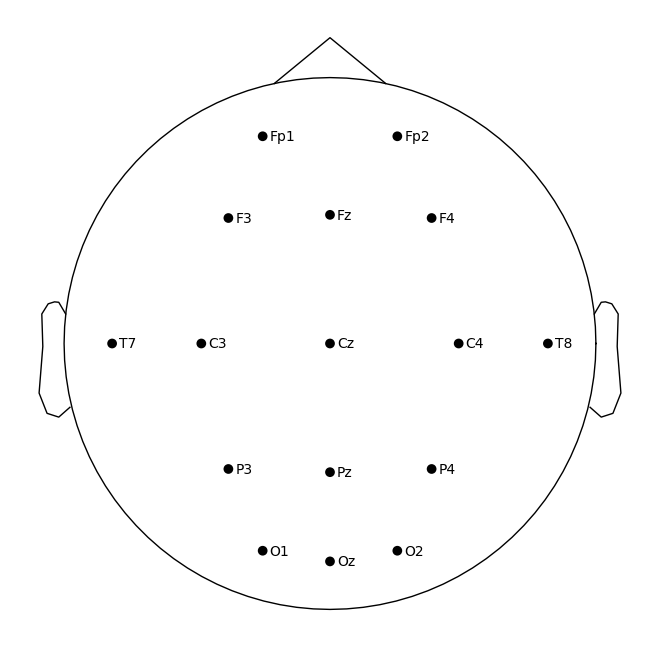

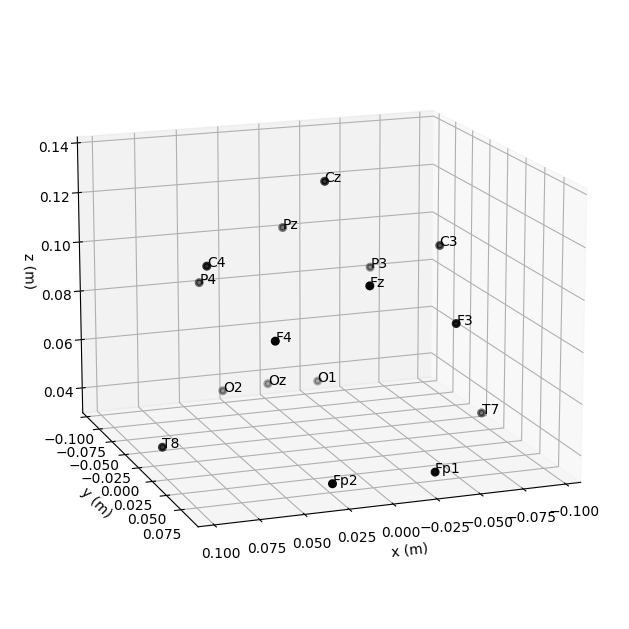

In [26]:
ShowMontageType()

## Data - Montage Example

In [27]:
svfolder = mne.datasets.ssvep.data_path(verbose=False)

### Paths

In [40]:
ssvepjsoninformation = (svfolder / "sub-02" / "ses-01" / "eeg" / "sub-02_ses-01_task-ssvep_eeg.json")

In [28]:
svvhdrpathraw = (svfolder / "sub-02" / "ses-01" / "eeg" / "sub-02_ses-01_task-ssvep_eeg.vhdr")

### Read Informations

In [43]:
with open(ssvepjsoninformation) as jread:
  infossvep = jread.read()
  infossvep = json.loads(infossvep)

In [49]:
for k_,v_ in infossvep.items():
  print(f"{k_}: {v_}")

TaskName: ssvep
TaskDescription: Participants observed checkerboards patterns inverting with a constant frequency of either 12Hz of 15Hz. 10 trials of 30s length each.
InstitutionName: Max-Planck-Institute for Empirical Aesthetics, Frankfurt a.M., Germany
Manufacturer: BrainProducts
ManufacturersModelName: BrainAmp DC
PowerLineFrequency: 50.0
SamplingFrequency: 1000.0
SoftwareFilters: n/a
RecordingDuration: 469.679
RecordingType: continuous
EEGReference: FCz
EEGGround: AFz
EEGPlacementScheme: based on the extended 10/20 system
EEGChannelCount: 32
EOGChannelCount: 0
ECGChannelCount: 0
EMGChannelCount: 0
MiscChannelCount: 0
TriggerChannelCount: 0


### Display VHDR

In [29]:
svvhdrraw = mne.io.read_raw_brainvision(svvhdrpathraw,verbose=False)

In [30]:
easycapmontage = mne.channels.make_standard_montage("easycap-M1")

Approximating Fpz location by mirroring Oz along the X and Y axes.


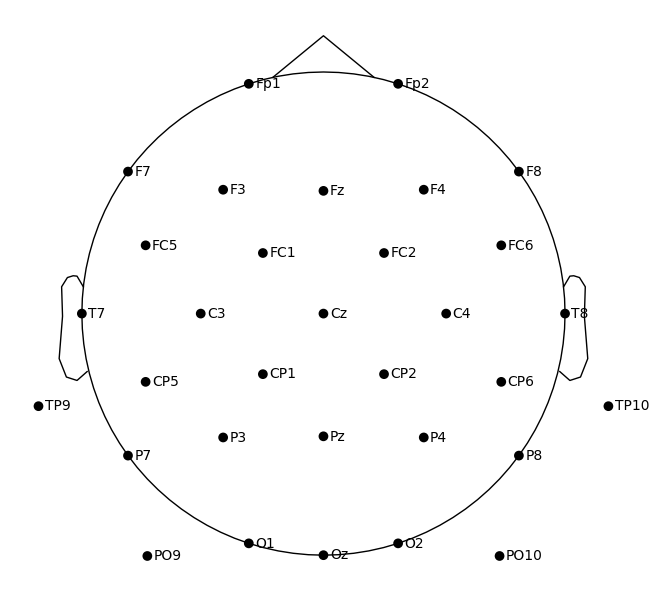

In [31]:
svvhdrraw.set_montage(easycapmontage)
fig = svvhdrraw.plot_sensors(show_names=True, sphere="eeglab")

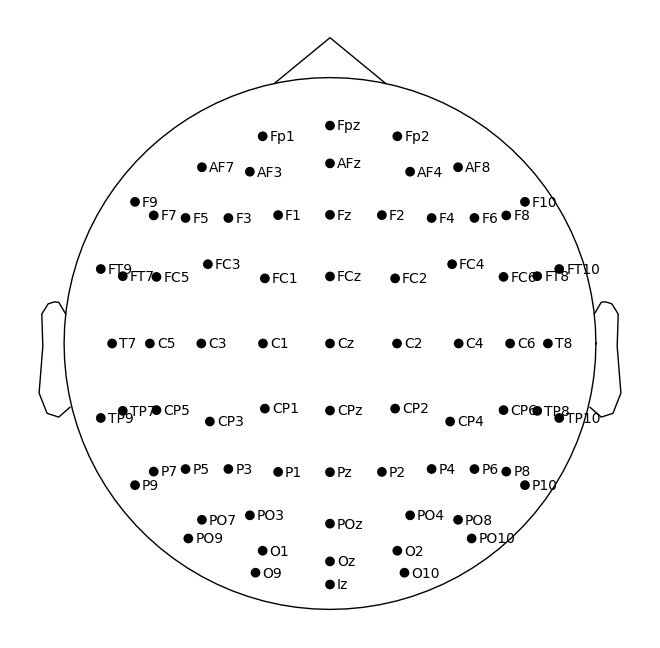

In [32]:
fg1 = easycapmontage.plot() #default radius of 0.095

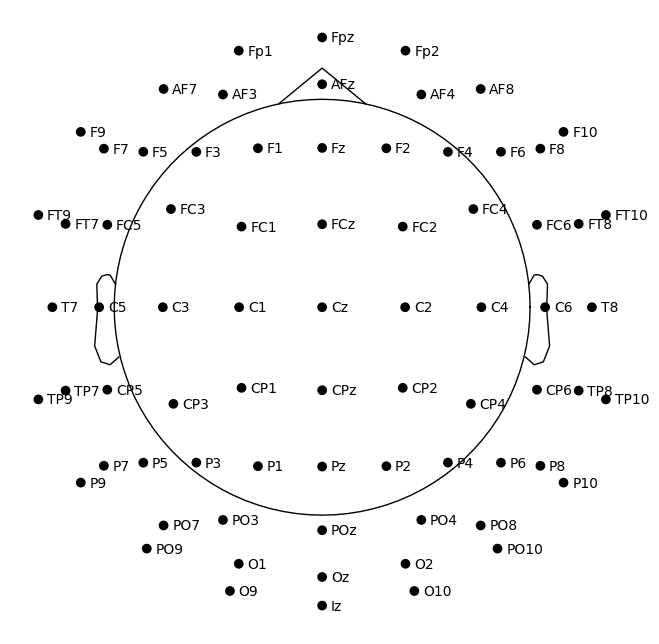

In [33]:
# radius
fg2 = easycapmontage.plot(sphere=0.06)

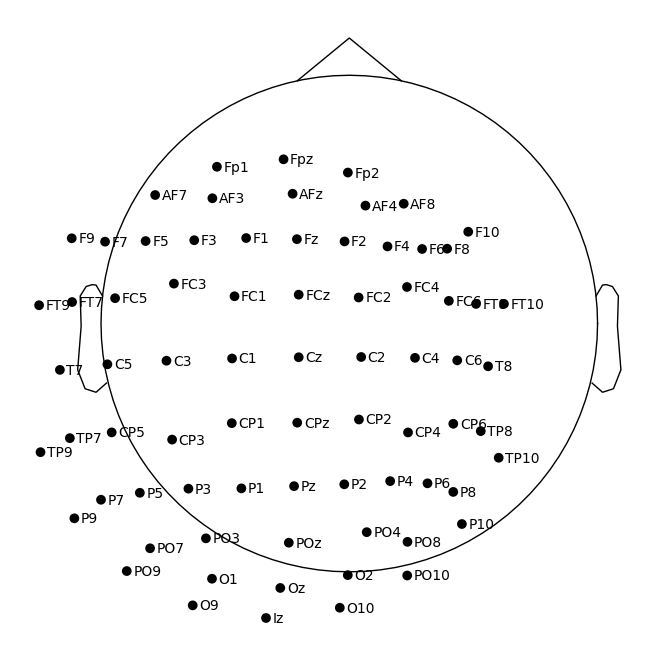

In [34]:
#(x, y, z, radius)
fg3 = easycapmontage.plot(sphere=(0.03, 0.02, 0.01, 0.095))

## Reading Sensor - Example

In [35]:
sample_data = mne.datasets.sample.data_path()

Using default location ~/mne_data for sample...


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 1.49TB/s]


Download complete in 01m03s (1576.2 MB)


### File

In [36]:
audvisrawpath = sample_data / "MEG" / "sample" / "sample_audvis_raw.fif"
sampleraw = mne.io.read_raw_fif(audvisrawpath,preload=False,verbose=False)

### Informations

In [50]:
print(sampleraw.info)

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


In [52]:
rawinfo = mne.io.read_info(audvisrawpath)

    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle


In [54]:
for k_ in rawinfo.keys():
  if k_ == "ch_names":
    print(f"Channels:\n\n{rawinfo[k_]}")

Channels:

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG

### Plot - EEG

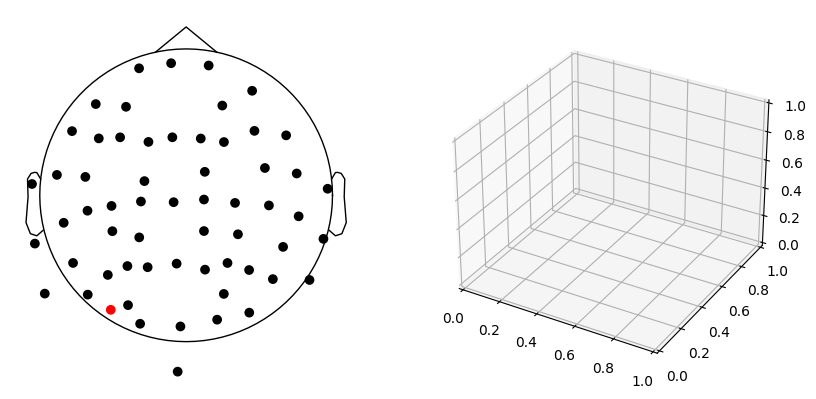

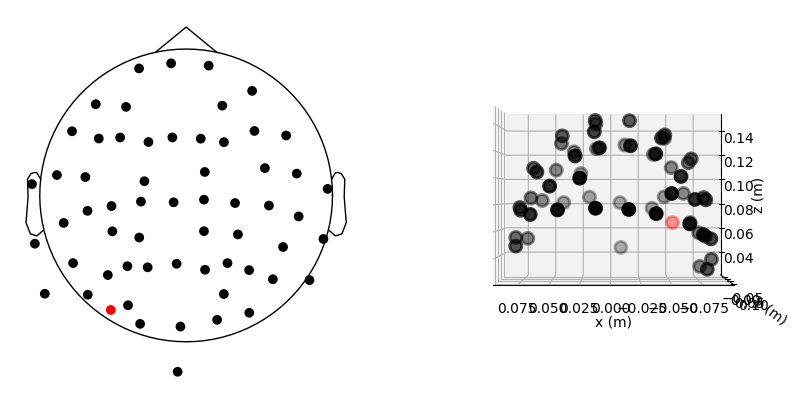

In [38]:
fg = plt.figure(figsize=(10,6))
ax2d = fg.add_subplot(121)
ax3d = fg.add_subplot(122,projection="3d")
sampleraw.plot_sensors(ch_type="eeg",axes=ax2d)
sampleraw.plot_sensors(ch_type="eeg",axes=ax3d,kind="3d")
#ax3d.view_init(azim=70,elev=15)

# Real Data Process

EEG data included 5 min eyes-closed resting-state with 19 or 64 channels acquired with 500–1,000 Hz sampling rate and 0.1–100 on-line filters via Neuroscan (Scan 4.5; Compumedics NeuroScan, Victoria, Australia). Electrode impedances were kept below 5 kΩ by application of an abrasive and electrically conductive gel. In the analysis, the EEG data were down-sampled to 128 Hz, and 19 channels were selected based on the international 10–20 system in conjunction with a mastoid reference electrode as follows: FP1, FP2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, P4, P8, O1, and O2. The ground channel was located between the FPz and Fz electrodes.

Each EEG parameter was calculated in the following frequency bands: delta (1–4 Hz), theta (4–8 Hz), alpha (8–12 Hz), beta (12–25 Hz), high beta (25–30 Hz), and gamma (30–40 Hz).

In [ ]:
%%capture
!pip install mne==1.1

## Create Directory

In [55]:
createDirectory("datasamplereal")

In [11]:
psyrawdata = "/content/datasamplereal/EEG.machinelearing_data_BRMH.csv"

## Electrode Positions - Manuel

In [13]:
channels = {'FP1':[-0.03,0.08],
            'FP2':[0.03,0.08],
            'F7':[-0.073,0.047],
            'F3':[-0.04,0.041],
            'Fz':[0,0.038],
            'F4':[0.04,0.041],
            'F8':[0.073,0.047],
            'T3':[-0.085,0],
            'C3':[-0.045,0],
            'Cz':[0,0],
            'C4':[0.045,0],
            'T4':[0.085,0],
            'T5':[-0.073,-0.047],
            'P3':[-0.04,-0.041],
            'Pz':[0,-0.038],
            'P4':[0.04,-0.041],
            'T6':[0.07,-0.047],
            'O1':[-0.03,-0.08],
            'O2':[0.03,-0.08]}

In [14]:
channel_frame = pd.DataFrame(channels).transpose()

In [15]:
channel_frame.head(5)

0      1
FP1 -0.030  0.080
FP2  0.030  0.080
F7  -0.073  0.047
F3  -0.040  0.041
Fz   0.000  0.038

### Positions - Converting 3D

In [16]:
for k_ in channels.keys():
  channels[k_] += [0]

In [17]:
print(f"3D-Channels:\n\n{channels}")

3D-Channels:

{'FP1': [-0.03, 0.08, 0], 'FP2': [0.03, 0.08, 0], 'F7': [-0.073, 0.047, 0], 'F3': [-0.04, 0.041, 0], 'Fz': [0, 0.038, 0], 'F4': [0.04, 0.041, 0], 'F8': [0.073, 0.047, 0], 'T3': [-0.085, 0, 0], 'C3': [-0.045, 0, 0], 'Cz': [0, 0, 0], 'C4': [0.045, 0, 0], 'T4': [0.085, 0, 0], 'T5': [-0.073, -0.047, 0], 'P3': [-0.04, -0.041, 0], 'Pz': [0, -0.038, 0], 'P4': [0.04, -0.041, 0], 'T6': [0.07, -0.047, 0], 'O1': [-0.03, -0.08, 0], 'O2': [0.03, -0.08, 0]}


### Positions - Plot

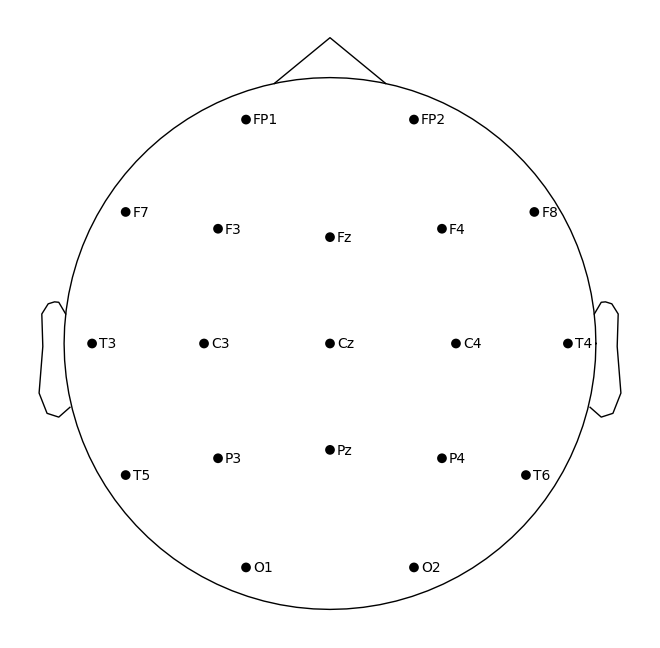

In [18]:
mnplot = mne.channels.make_dig_montage(channels)
mnplot.plot()
plt.show()

## Read & Modify Data

In [19]:
class ReadData(object):
  def __init__(self,datapath:str)->CLASSINIT:
    self.dt = datapath
    if os.path.exists(self.dt):
      self.main = pd.read_csv(self.dt)
    else:
      self.main = pd.read_csv(psyrawdata)
    self.columns = self.main.columns
  def __str__(self)->str:
    return "Reading Data"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModules(TypeError,outputerrormessage).Raise()
  def GetData(self)->DATA:
    return self.main

In [20]:
psydata = ReadData(psyrawdata).GetData()

In [21]:
maxIQ = psydata[psydata["IQ"] == psydata["IQ"].max()].reset_index(drop=True)
minIQ = psydata[psydata["IQ"] == psydata["IQ"].min()].reset_index(drop=True)

In [22]:
maxIQ.head(5)

no. sex    age   eeg.date  education     IQ  main.disorder  \
0  337   M  25.61  2011.6.29       16.0  145.0  Mood disorder   

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0  Depressive disorder         31.886418         31.684946  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0               85.62268              72.946624              50.672065   

   COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0              74.601011              80.161218              44.017559   

   COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0              78.621179              42.143465              81.431241   

   COH.F.gamma.r.O1.s.O2  
0                63.2808  

[1 rows x 1149 columns]

In [23]:
minIQ.head()

no. sex    age   eeg.date  education    IQ     main.disorder  \
0  795   M  39.55  2018.7.19       12.0  49.0  Anxiety disorder   

         specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0  Social anxiety disorder         14.699271         15.458833  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0              69.986259              68.479495              62.463426   

   COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0              67.546165               80.35552              63.236555   

   COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0              74.166251              69.436291              84.096078   

   COH.F.gamma.r.O1.s.O2  
0              72.962394  

[1 rows x 1149 columns]

In [24]:
psydata.head(5)

no. sex   age    eeg.date  education     IQ       main.disorder  \
0    1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1    2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2    3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3    4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4    5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   

      specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0  Alcohol use disorder         35.998557         21.717375  ...   
1  Alcohol use disorder         13.425118         11.002916  ...   
2  Alcohol use disorder         29.941780         27.544684  ...   
3  Alcohol use disorder         21.496226         21.846832  ...   
4  Alcohol use disorder         37.775667         33.607679  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0              55.989192              16.739679              23.452271   
1              45.595619              17.510824              26.777368   
2              99.475453              70.654171              39.131547   
3              59.986561              63.822201              36.478254   
4              61.462720              59.166097              51.465531   

   COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0              45.678820              30.167520              16.918761   
1              28.201062              57.108861              32.375401   
2              69.920996              71.063644              38.534505   
3              47.117006              84.658376              24.724096   
4              58.635415              80.685608              62.138436   

   COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0              48.850427               9.422630              34.507082   
1              60.351749              13.900981              57.831848   
2              69.908764              27.180532              64.803155   
3              50.299349              35.319695              79.822944   
4              75.888749              61.003944              87.455509   

   COH.F.gamma.r.O1.s.O2  
0              28.613029  
1              43.463261  
2              31.485799  
3              41.141873  
4              70.531662  

[5 rows x 1149 columns]

In [25]:
isNullparams = psydata.isna().sum()

In [26]:
missing_data_params = isNullparams[isNullparams == psydata.shape[0]].index[0]
print(missing_data_params)

Unnamed: 122


In [27]:
psydata = psydata.loc[:,"main.disorder":missing_data_params].drop(missing_data_params,axis=1)
psydata = psydata.reset_index(drop=True)

In [28]:
psydata.isna().sum()

main.disorder        0
specific.disorder    0
AB.A.delta.a.FP1     0
AB.A.delta.b.FP2     0
AB.A.delta.c.F7      0
                    ..
AB.F.gamma.o.Pz      0
AB.F.gamma.p.P4      0
AB.F.gamma.q.T6      0
AB.F.gamma.r.O1      0
AB.F.gamma.s.O2      0
Length: 116, dtype: int64

In [29]:
psydata.head(5)

main.disorder     specific.disorder  AB.A.delta.a.FP1  \
0  Addictive disorder  Alcohol use disorder         35.998557   
1  Addictive disorder  Alcohol use disorder         13.425118   
2  Addictive disorder  Alcohol use disorder         29.941780   
3  Addictive disorder  Alcohol use disorder         21.496226   
4  Addictive disorder  Alcohol use disorder         37.775667   

   AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  AB.A.delta.e.Fz  \
0         21.717375        21.518280        26.825048        26.611516   
1         11.002916        11.942516        15.272216        14.151570   
2         27.544684        17.150159        23.608960        27.087811   
3         21.846832        17.364316        13.833701        14.100954   
4         33.607679        21.865556        21.771413        22.854536   

   AB.A.delta.f.F4  AB.A.delta.g.F8  AB.A.delta.h.T3  ...  AB.F.gamma.j.Cz  \
0        25.732649        16.563408        29.891368  ...         1.993727   
1        12.456034         8.436832         9.975238  ...         0.903383   
2        13.541237        16.523963        12.775574  ...         1.096713   
3        13.100939        14.613650         8.063191  ...         1.115040   
4        21.456377        15.969042         9.434306  ...         1.193191   

   AB.F.gamma.k.C4  AB.F.gamma.l.T4  AB.F.gamma.m.T5  AB.F.gamma.n.P3  \
0         1.765493         1.464281         1.501948         1.707307   
1         0.931967         0.437117         0.930843         1.234874   
2         1.691152         1.505663         1.133891         1.661768   
3         1.122776         2.128138         1.648217         1.147666   
4         2.320845         3.562820         1.441662         1.018804   

   AB.F.gamma.o.Pz  AB.F.gamma.p.P4  AB.F.gamma.q.T6  AB.F.gamma.r.O1  \
0         1.553448         1.552658         1.388662         1.592717   
1         1.373268         1.411808         1.140695         1.118041   
2         1.403429         1.349457         1.270525         1.408471   
3         1.049152         1.131654         1.415856         1.391048   
4         1.274009         2.350806         2.307730         2.129431   

   AB.F.gamma.s.O2  
0         1.806598  
1         3.162143  
2         1.454618  
3         1.527403  
4         3.766860  

[5 rows x 116 columns]

In [30]:
specdata = psydata.copy()

In [31]:
def ReformBands(bandname:str)->PROCESS:
  b,_,c = bandname[5:].split(sep=".")
  return f"{b}.{c}"

In [32]:
reformvec = np.vectorize(ReformBands)

In [33]:
colnames = np.concatenate((specdata.columns[:2],
                           reformvec(specdata.columns[2:])))

In [34]:
print(f"Columns Name:\n{colnames}")

Columns Name:
['main.disorder' 'specific.disorder' 'delta.FP1' 'delta.FP2' 'delta.F7'
 'delta.F3' 'delta.Fz' 'delta.F4' 'delta.F8' 'delta.T3' 'delta.C3'
 'delta.Cz' 'delta.C4' 'delta.T4' 'delta.T5' 'delta.P3' 'delta.Pz'
 'delta.P4' 'delta.T6' 'delta.O1' 'delta.O2' 'theta.FP1' 'theta.FP2'
 'theta.F7' 'theta.F3' 'theta.Fz' 'theta.F4' 'theta.F8' 'theta.T3'
 'theta.C3' 'theta.Cz' 'theta.C4' 'theta.T4' 'theta.T5' 'theta.P3'
 'theta.Pz' 'theta.P4' 'theta.T6' 'theta.O1' 'theta.O2' 'alpha.FP1'
 'alpha.FP2' 'alpha.F7' 'alpha.F3' 'alpha.Fz' 'alpha.F4' 'alpha.F8'
 'alpha.T3' 'alpha.C3' 'alpha.Cz' 'alpha.C4' 'alpha.T4' 'alpha.T5'
 'alpha.P3' 'alpha.Pz' 'alpha.P4' 'alpha.T6' 'alpha.O1' 'alpha.O2'
 'beta.FP1' 'beta.FP2' 'beta.F7' 'beta.F3' 'beta.Fz' 'beta.F4' 'beta.F8'
 'beta.T3' 'beta.C3' 'beta.Cz' 'beta.C4' 'beta.T4' 'beta.T5' 'beta.P3'
 'beta.Pz' 'beta.P4' 'beta.T6' 'beta.O1' 'beta.O2' 'highbeta.FP1'
 'highbeta.FP2' 'highbeta.F7' 'highbeta.F3' 'highbeta.Fz' 'highbeta.F4'
 'highbeta.F8' 'highbeta.

In [35]:
mainband = ['delta','theta','alpha','beta','highbeta','gamma']

In [36]:
specdata.set_axis(colnames,axis=1,inplace=True)
specdata.reset_index(drop=True,inplace=True)

In [37]:
specdata.head(5)

main.disorder     specific.disorder  delta.FP1  delta.FP2   delta.F7  \
0  Addictive disorder  Alcohol use disorder  35.998557  21.717375  21.518280   
1  Addictive disorder  Alcohol use disorder  13.425118  11.002916  11.942516   
2  Addictive disorder  Alcohol use disorder  29.941780  27.544684  17.150159   
3  Addictive disorder  Alcohol use disorder  21.496226  21.846832  17.364316   
4  Addictive disorder  Alcohol use disorder  37.775667  33.607679  21.865556   

    delta.F3   delta.Fz   delta.F4   delta.F8   delta.T3  ...  gamma.Cz  \
0  26.825048  26.611516  25.732649  16.563408  29.891368  ...  1.993727   
1  15.272216  14.151570  12.456034   8.436832   9.975238  ...  0.903383   
2  23.608960  27.087811  13.541237  16.523963  12.775574  ...  1.096713   
3  13.833701  14.100954  13.100939  14.613650   8.063191  ...  1.115040   
4  21.771413  22.854536  21.456377  15.969042   9.434306  ...  1.193191   

   gamma.C4  gamma.T4  gamma.T5  gamma.P3  gamma.Pz  gamma.P4  gamma.T6  \
0  1.765493  1.464281  1.501948  1.707307  1.553448  1.552658  1.388662   
1  0.931967  0.437117  0.930843  1.234874  1.373268  1.411808  1.140695   
2  1.691152  1.505663  1.133891  1.661768  1.403429  1.349457  1.270525   
3  1.122776  2.128138  1.648217  1.147666  1.049152  1.131654  1.415856   
4  2.320845  3.562820  1.441662  1.018804  1.274009  2.350806  2.307730   

   gamma.O1  gamma.O2  
0  1.592717  1.806598  
1  1.118041  3.162143  
2  1.408471  1.454618  
3  1.391048  1.527403  
4  2.129431  3.766860  

[5 rows x 116 columns]

In [38]:
mean_disorder = specdata.groupby("main.disorder").mean().reset_index()
mean_specific = specdata.groupby("specific.disorder").mean().reset_index()

In [39]:
print(f"Length of Main Disorder: {len(mean_disorder)}")
print(f"Length of Specific Disorder: {len(mean_specific)}")

Length of Main Disorder: 7
Length of Specific Disorder: 12


In [40]:
mean_disorder = pd.wide_to_long(mean_disorder,mainband,["main.disorder"],"channel",sep=".",suffix="\w+")
mean_specific = pd.wide_to_long(mean_specific,mainband,["specific.disorder"],"channel",sep=".",suffix="\w+")

In [41]:
mean_disorder.head(5)

delta      theta      alpha  \
main.disorder                 channel                                    
Addictive disorder            FP1      18.831516  13.836983  24.308169   
Anxiety disorder              FP1      20.212546  12.220164  20.542989   
Healthy control               FP1      18.383673  11.877841  21.024037   
Mood disorder                 FP1      20.652163  13.594064  23.575915   
Obsessive compulsive disorder FP1      18.261254  12.469764  24.380553   

                                            beta  highbeta     gamma  
main.disorder                 channel                                 
Addictive disorder            FP1      10.588020  2.041568  2.418517  
Anxiety disorder              FP1      11.369194  2.362892  2.874982  
Healthy control               FP1       9.197048  2.055055  2.577345  
Mood disorder                 FP1      12.357410  2.629678  3.292514  
Obsessive compulsive disorder FP1       9.946188  2.199657  3.096013

In [42]:
mean_specific.head(5)

delta      theta      alpha  \
specific.disorder             channel                                    
Acute stress disorder         FP1      21.010092  21.449696  29.986463   
Adjustment disorder           FP1      22.409204  15.188234  27.723441   
Alcohol use disorder          FP1      19.031935  14.487469  31.710026   
Behavioral addiction disorder FP1      18.631096  13.186498  16.906313   
Bipolar disorder              FP1      20.920267  12.899219  22.731308   

                                            beta  highbeta     gamma  
specific.disorder             channel                                 
Acute stress disorder         FP1      14.860550  2.419641  2.379800  
Adjustment disorder           FP1      11.964587  2.481214  3.110645  
Alcohol use disorder          FP1      12.026554  2.016023  2.193860  
Behavioral addiction disorder FP1       9.149485  2.067112  2.643175  
Bipolar disorder              FP1      13.258815  2.519366  3.336706

## Approaches - Control

In [43]:
dataconf = ReadData(psyrawdata).GetData()

In [44]:
print(f"Main Disorder Types-Count: {dataconf['main.disorder'].value_counts()}")

Main Disorder Types-Count: Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: main.disorder, dtype: int64


In [45]:
print(f"Specific Disorder Types-count: {dataconf['main.disorder'].value_counts()}")

Specific Disorder Types-count: Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: main.disorder, dtype: int64


In [46]:
print(f"Max IQ: {dataconf['IQ'].max()}")
print(f"Max Education: {dataconf['education'].max()}")

Max IQ: 145.0
Max Education: 20.0


## Band & Disorders

In [47]:
mean_disorder.loc["Schizophrenia"]

delta      theta      alpha       beta  highbeta     gamma
channel                                                                
FP1      21.537751  13.491386  25.953966  13.427850  2.808688  3.681332
FP2      22.646490  14.186994  26.798008  13.983367  2.913742  3.840776
F7       19.992494  10.804500  19.413077  11.236998  2.525529  3.586139
F3       19.890804  15.219211  29.843203  15.407617  2.838901  3.380585
Fz       21.009200  17.651967  34.052041  16.729387  2.861110  3.279946
F4       20.683710  16.638379  33.040761  16.581442  2.916087  3.411508
F8       18.344536  11.565453  21.817325  12.807772  2.699238  3.784580
T3       12.783527   7.312659  12.572919  10.560272  2.451827  4.228335
C3       17.231452  13.130086  29.361885  15.133644  2.484440  3.165926
Cz       20.366091  16.572987  36.987880  16.864486  2.759720  3.080554
C4       18.373922  14.242824  32.445038  16.115777  2.537597  3.041254
T4       13.591829   8.448227  14.774330  10.705238  2.235216  3.387337
T5       12.402377   7.871644  16.276307   9.372271  1.758010  2.435776
P3       15.562962  11.272800  28.661309  14.807887  2.150098  2.736861
Pz       17.598650  13.411296  34.791299  16.358058  2.243008  2.799705
P4       17.898700  13.107028  33.379751  16.479688  2.280099  2.865227
T6       15.737904  10.186975  27.846563  13.275208  2.138776  2.966232
O1       14.427239  10.851630  28.182203  14.994344  2.780481  4.257993
O2       14.780898   9.635807  28.995409  14.521340  2.627968  3.868594

In [48]:
healthydf= mean_disorder.loc["Healthy control"]
schizophreniadf = mean_disorder.loc["Schizophrenia"]
traumadf = mean_disorder.loc["Trauma and stress related disorder"]
obsessivedf = mean_disorder.loc["Obsessive compulsive disorder"]

In [49]:
print(f"Healthy Delta Wave Control:\n{healthydf['delta']}")

Healthy Delta Wave Control:
channel
FP1    18.383673
FP2    19.497090
F7     15.526428
F3     17.398592
Fz     18.687952
F4     17.443004
F8     16.333668
T3      9.459207
C3     14.955463
Cz     18.445923
C4     15.509692
T4     10.600517
T5      8.060507
P3     12.912335
Pz     15.067179
P4     13.958189
T6     10.882855
O1      9.319766
O2      9.597102
Name: delta, dtype: float64


In [50]:
print(f"Schizophrenia Delta Wave Control:\n{schizophreniadf['delta']}")

Schizophrenia Delta Wave Control:
channel
FP1    21.537751
FP2    22.646490
F7     19.992494
F3     19.890804
Fz     21.009200
F4     20.683710
F8     18.344536
T3     12.783527
C3     17.231452
Cz     20.366091
C4     18.373922
T4     13.591829
T5     12.402377
P3     15.562962
Pz     17.598650
P4     17.898700
T6     15.737904
O1     14.427239
O2     14.780898
Name: delta, dtype: float64


In [51]:
print(f"Trauma Delta Wave Control:\n{traumadf['delta']}")

Trauma Delta Wave Control:
channel
FP1    21.934463
FP2    22.951054
F7     19.072408
F3     20.285776
Fz     22.298874
F4     20.938887
F8     17.851418
T3     13.135600
C3     17.643639
Cz     20.758773
C4     18.421980
T4     13.134007
T5     11.857366
P3     16.505816
Pz     18.447532
P4     18.235282
T6     14.185770
O1     14.464098
O2     13.619173
Name: delta, dtype: float64


In [52]:
print(f"Obsessive Delta Wave Control:\n{obsessivedf['delta']}")

Obsessive Delta Wave Control:
channel
FP1    18.261254
FP2    19.495833
F7     15.907084
F3     16.771218
Fz     18.489591
F4     17.555625
F8     14.933192
T3     10.845902
C3     14.746984
Cz     18.127476
C4     15.252206
T4     10.666412
T5     10.130791
P3     12.931880
Pz     15.505265
P4     14.127255
T6     11.260344
O1     11.488180
O2     11.490165
Name: delta, dtype: float64


## Visualising - Test

In [65]:
class PlottingEEG(object):
  def __init__(self)->PROCESS:
    self.chname = None
    self.speccmap = "Spectral_r"
    self.cbpos = (0.9,0.1)
    self.cbwdt = 0.04
    self.cbhgt = 0.90
    self.vmin = None
    self.vmax = None
    self.markertype = None
  def __str__(self)->str:
    return "EEG Visualization"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModules(TypeError,outputerrormessage).Raise()
  def __repr__(self)->DOCUMENTATION:
    return PlottingEEG.__doc__
  def GetPlot(self,level:list or DATA,position:list or DATA,axes:CLASSINIT,figtype:CLASSINIT,**kwargs)->PROCESS:
    if "mask" not in kwargs:
      mask = np.ones(level.shape[0],dtype="bool")
    else:
      mask = None
    i_,c_ = mne.viz.plot_topomap(level,
                                 position,
                                 axes=axes,
                                 vmin=self.vmin,
                                 vmax=self.vmax,
                                 names=self.chname,
                                 cmap=self.speccmap,
                                 mask=mask,
                                 mask_params=self.markertype,
                                 show=False,
                                 extrapolate="head")
    cbar = figtype.add_axes([self.cbpos[0],self.cbpos[1],self.cbwdt,self.cbhgt])
    clb = axes.figure.colorbar(i_,cax=cbar)
    return i_,c_

In [66]:
pltclass = PlottingEEG()

### Delta Data

In [70]:
schizophrenia_delta = mean_disorder.loc["Schizophrenia","delta"]
healthy_delta = mean_disorder.loc["Healthy control","delta"]
trauma_delta = mean_disorder.loc["Trauma and stress related disorder","delta"]
obsessive_delta = mean_disorder.loc["Obsessive compulsive disorder","delta"]

### Gamma Data

In [73]:
schizophrenia_gamma = mean_disorder.loc["Schizophrenia","gamma"]
healthy_gamma = mean_disorder.loc["Healthy control","gamma"]
trauma_gamma = mean_disorder.loc["Trauma and stress related disorder","gamma"]
obsessive_gamma = mean_disorder.loc["Obsessive compulsive disorder","gamma"]

### Control

In [67]:
pltclass.markertype = {"markersize":3,
                       "markerfacecolor":"yellow",
                       "marker":"o",
                       "markeredgecolor":"black",
                       "linewidth":"0"}
pltclass.vmin = 0

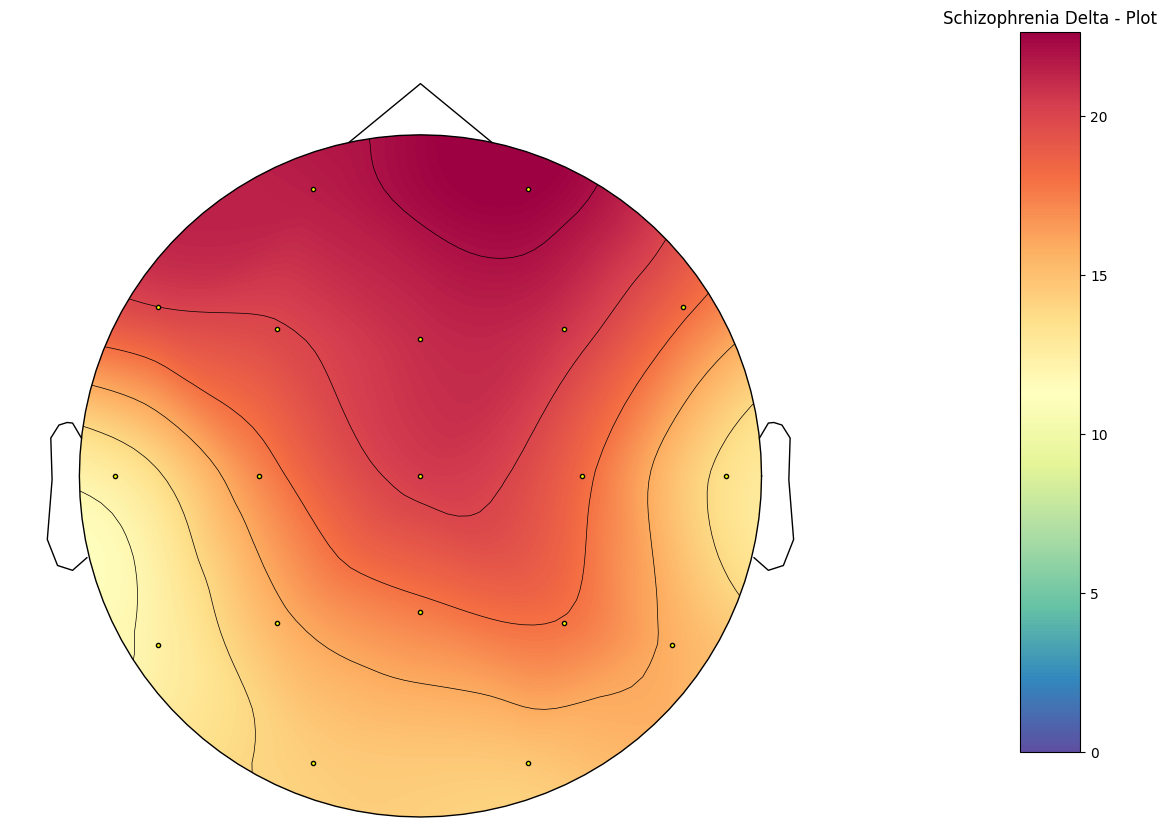

In [68]:
fig_,ax_ = plt.subplots(figsize=(15,8))
pltclass.GetPlot(schizophrenia_delta,
                 channel_frame.to_numpy(),
                 ax_,
                 fig_)
plt.title("Schizophrenia Delta - Plot")
plt.tight_layout()
plt.show()

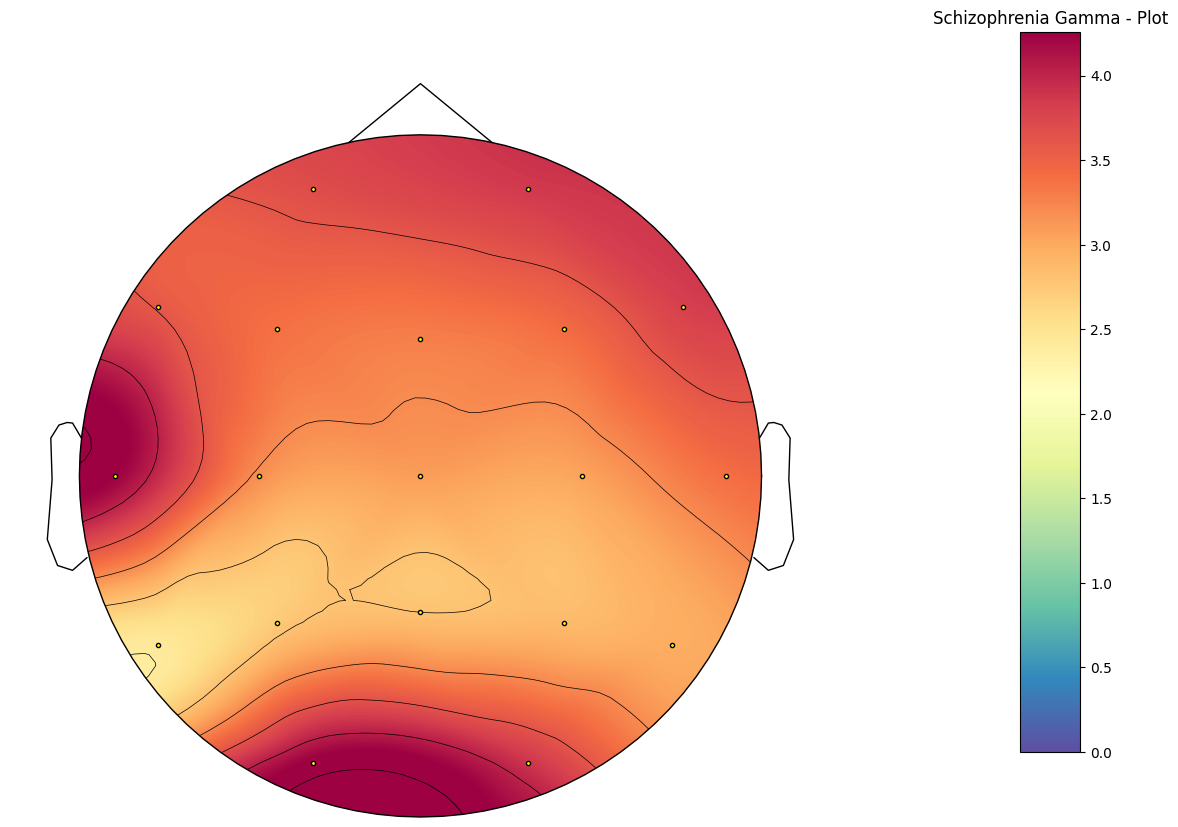

In [74]:
fig_,ax_ = plt.subplots(figsize=(15,8))
pltclass.GetPlot(schizophrenia_gamma,
                 channel_frame.to_numpy(),
                 ax_,
                 fig_)
plt.title("Schizophrenia Gamma - Plot")
plt.tight_layout()
plt.show()

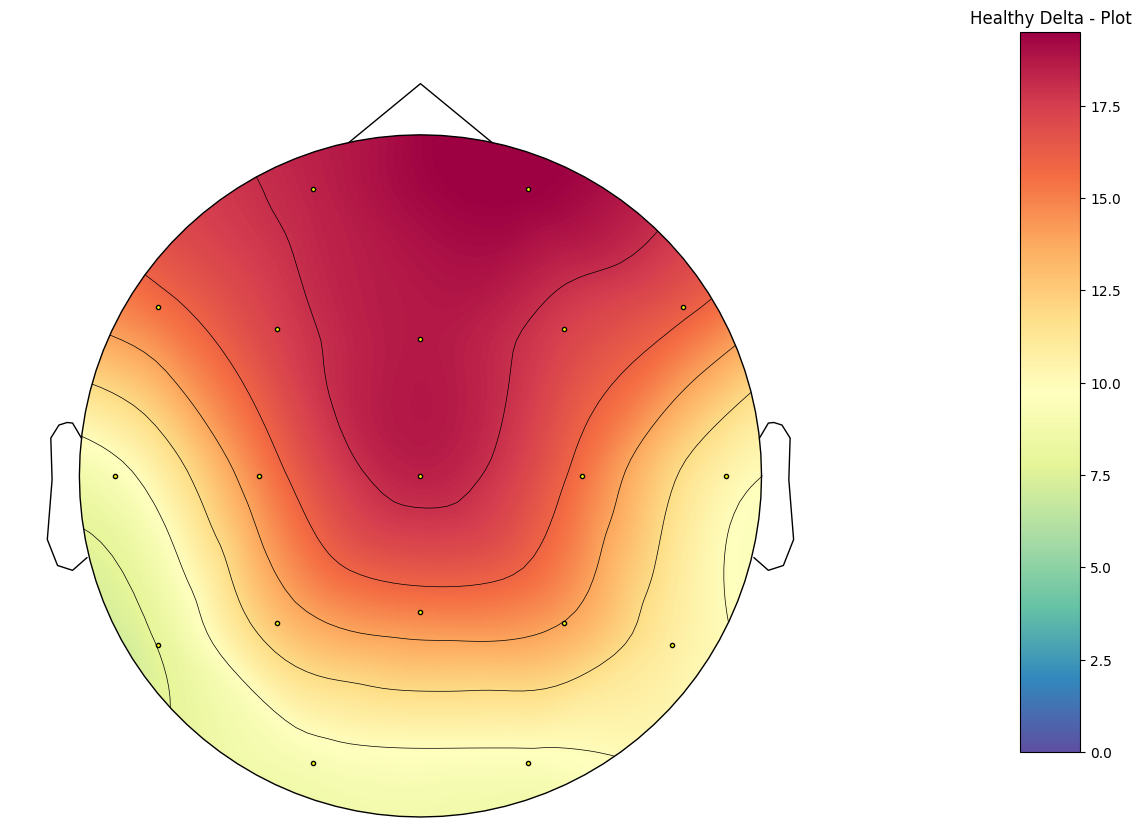

In [69]:
fig_,ax_ = plt.subplots(figsize=(15,8))
pltclass.GetPlot(healthy_delta,
                 channel_frame.to_numpy(),
                 ax_,
                 fig_)
plt.title("Healthy Delta - Plot")
plt.tight_layout()
plt.show()

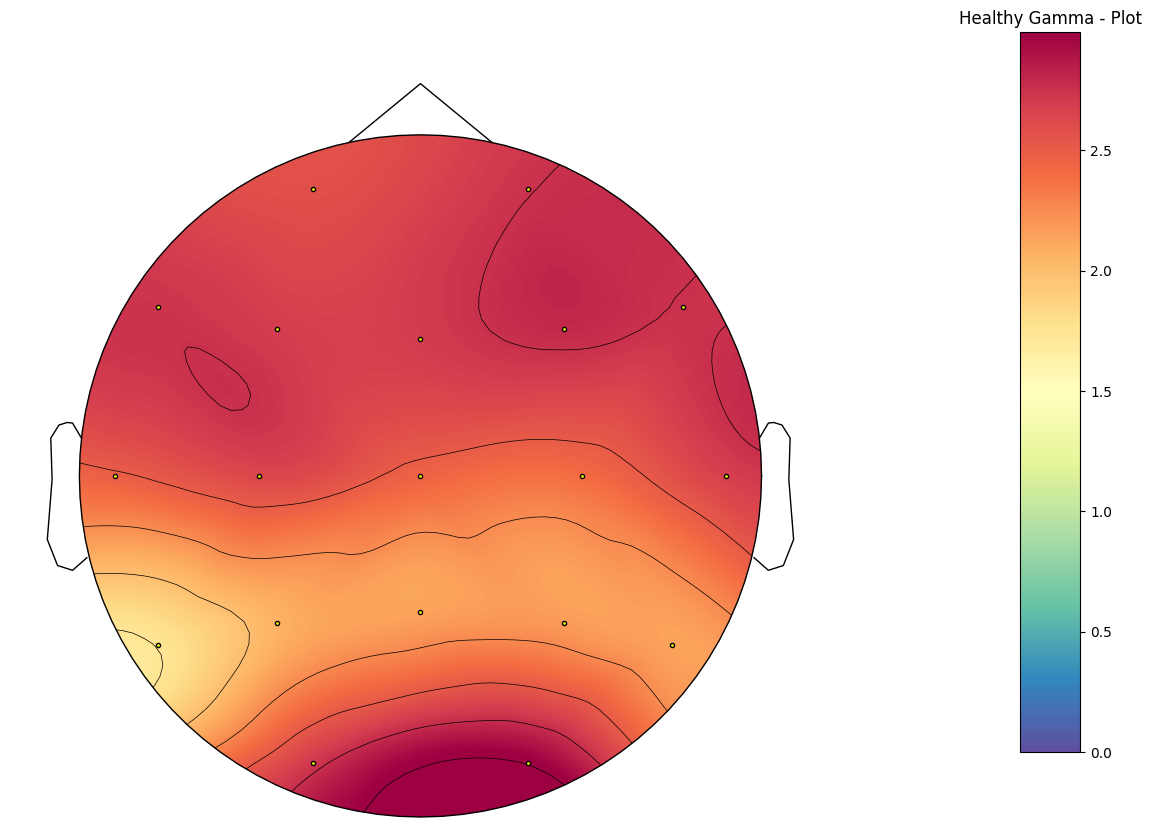

In [75]:
fig_,ax_ = plt.subplots(figsize=(15,8))
pltclass.GetPlot(healthy_gamma,
                 channel_frame.to_numpy(),
                 ax_,
                 fig_)
plt.title("Healthy Gamma - Plot")
plt.tight_layout()
plt.show()

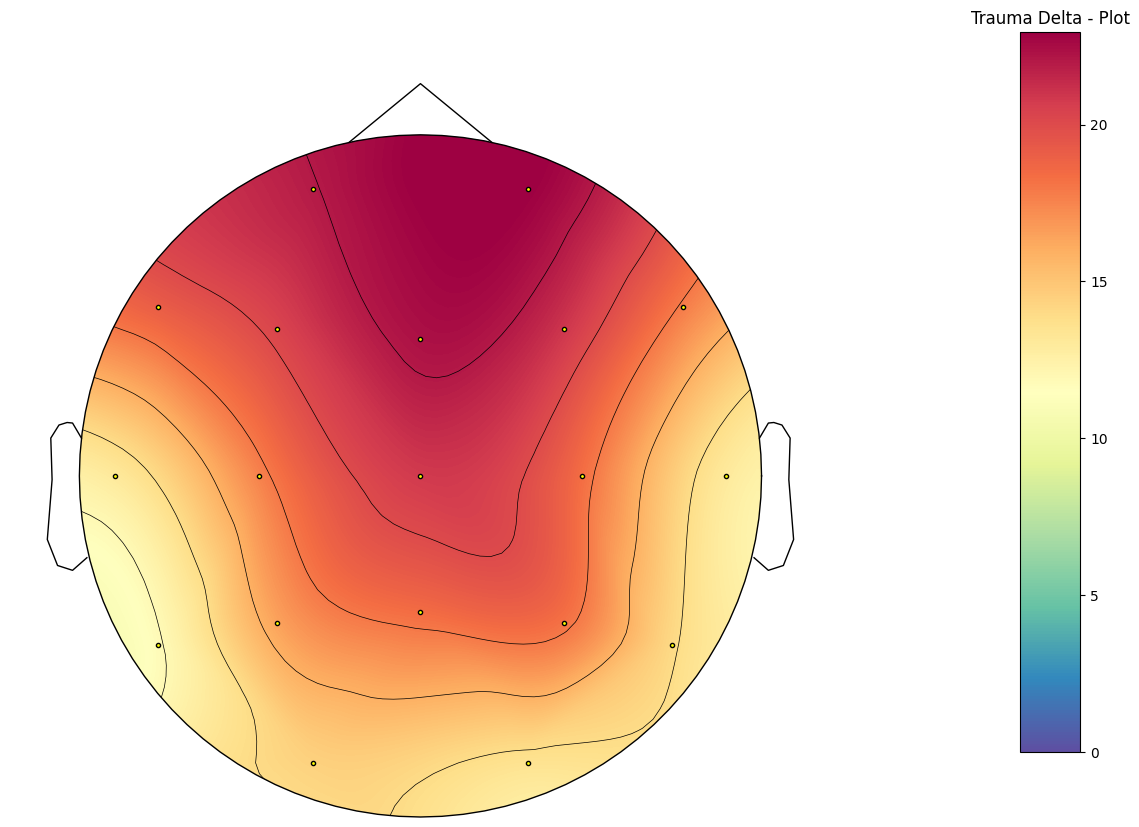

In [71]:
fig_,ax_ = plt.subplots(figsize=(15,8))
pltclass.GetPlot(trauma_delta,
                 channel_frame.to_numpy(),
                 ax_,
                 fig_)
plt.title("Trauma Delta - Plot")
plt.tight_layout()
plt.show()

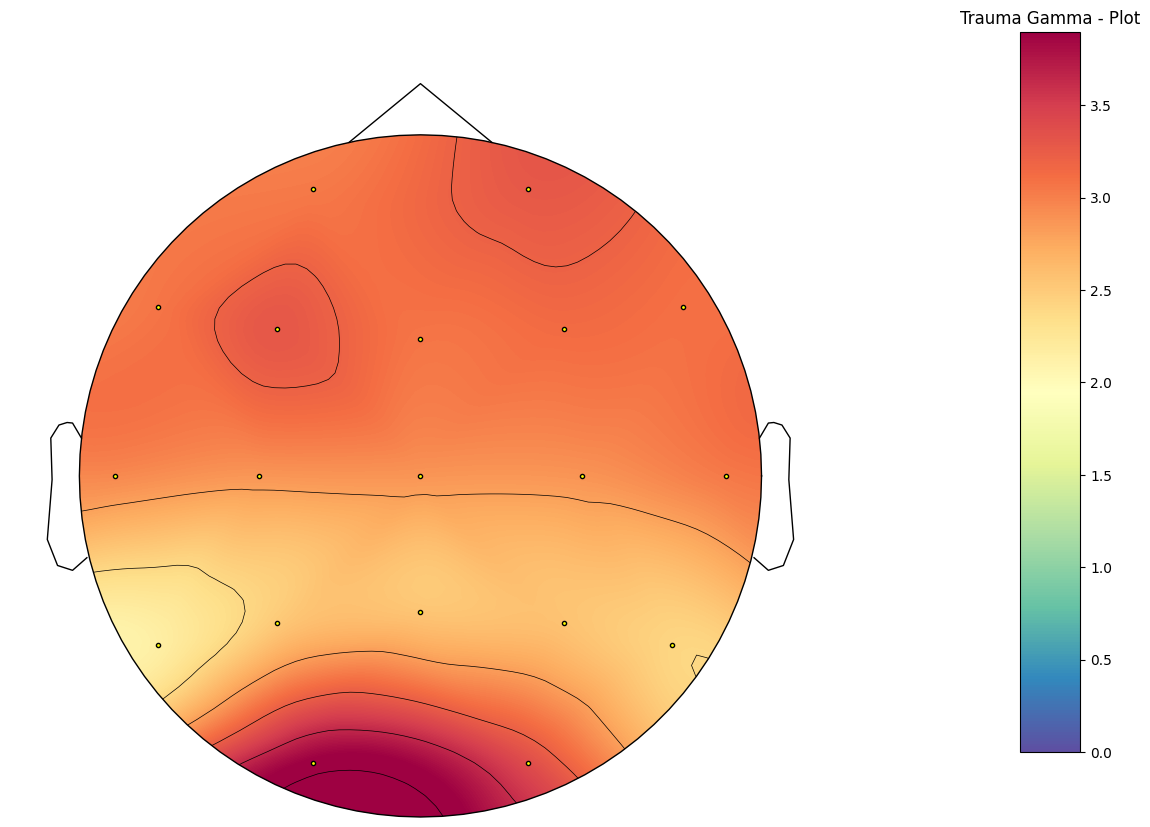

In [76]:
fig_,ax_ = plt.subplots(figsize=(15,8))
pltclass.GetPlot(trauma_gamma,
                 channel_frame.to_numpy(),
                 ax_,
                 fig_)
plt.title("Trauma Gamma - Plot")
plt.tight_layout()
plt.show()

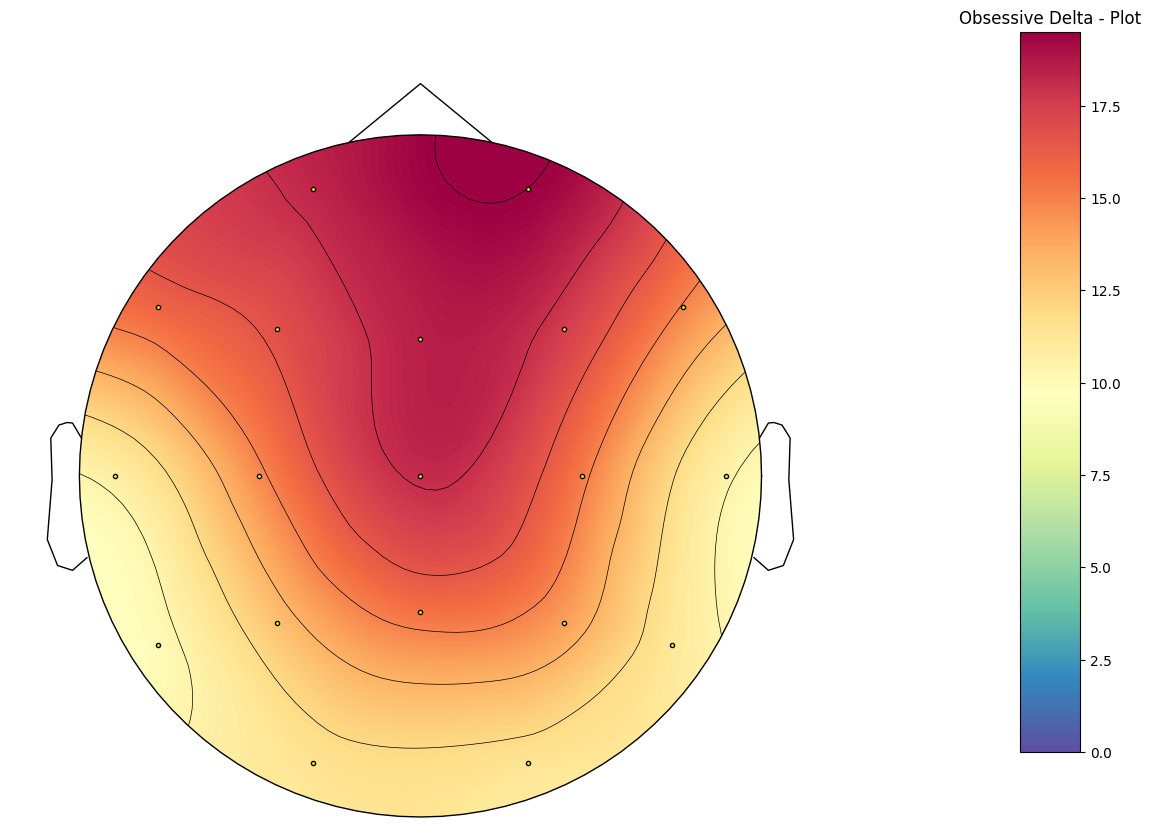

In [72]:
fig_,ax_ = plt.subplots(figsize=(15,8))
pltclass.GetPlot(obsessive_delta,
                 channel_frame.to_numpy(),
                 ax_,
                 fig_)
plt.title("Obsessive Delta - Plot")
plt.tight_layout()
plt.show()

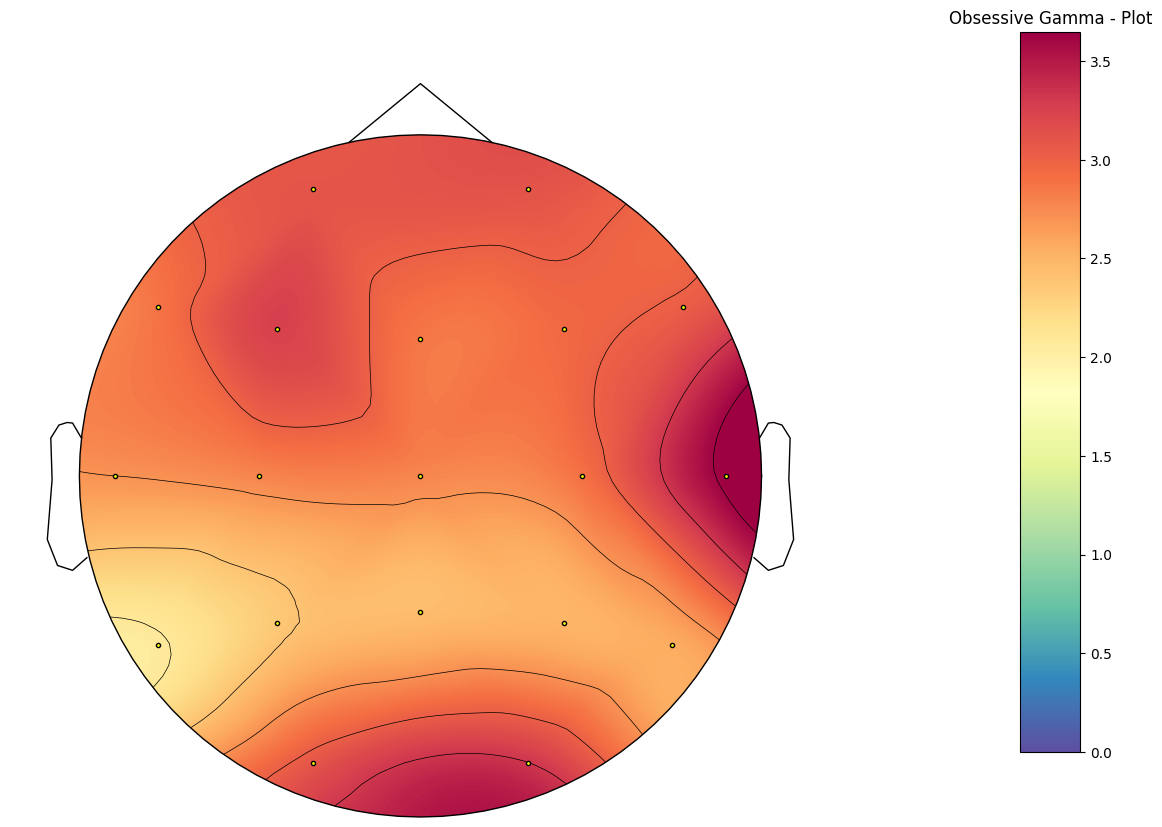

In [77]:
fig_,ax_ = plt.subplots(figsize=(15,8))
pltclass.GetPlot(obsessive_gamma,
                 channel_frame.to_numpy(),
                 ax_,
                 fig_)
plt.title("Obsessive Gamma - Plot")
plt.tight_layout()
plt.show()

# Conclusion

In [114]:
def plotBrainRegions():
    fig, ax = plt.subplots(figsize=(10, 7))
    brain = patches.Ellipse((0.5, 0.5), width=1, height=1.4, color='lightgray', ec='black')
    frontal_lobe = patches.Ellipse((0.5, 0.9), width=0.8, height=0.4, color='gray', ec='black')
    parietal_lobe = patches.Ellipse((0.5, 0.7), width=0.8, height=0.4, color='gray', ec='black')
    temporal_lobe = patches.Ellipse((0.2, 0.5), width=0.4, height=0.6, color='gray', ec='black')
    occipital_lobe = patches.Ellipse((0.5, 0.2), width=0.6, height=0.3, color='gray', ec='black')
    cerebellum = patches.Ellipse((0.5, 0.05), width=0.6, height=0.2, color='darkgray', ec='black')
    ax.add_patch(brain)
    ax.add_patch(frontal_lobe)
    ax.add_patch(parietal_lobe)
    ax.add_patch(temporal_lobe)
    ax.add_patch(occipital_lobe)
    ax.add_patch(cerebellum)
    ax.text(0.5, 1.0, "Frontal Lobe", ha='center', va='center', fontweight='bold')
    ax.text(0.5, 0.75, "Parietal Lobe", ha='center', va='center', fontweight='bold')
    ax.text(0.2, 0.5, "Temporal Lobe", ha='center', va='center', fontweight='bold', rotation=90)
    ax.text(0.5, 0.15, "Occipital Lobe", ha='center', va='center', fontweight='bold')
    ax.text(0.5, 0.05, "Cerebellum", ha='center', va='center', fontweight='bold')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.5)
    ax.axis('off')
    plt.title('Sagittal-Brain Regions')
    plt.show()

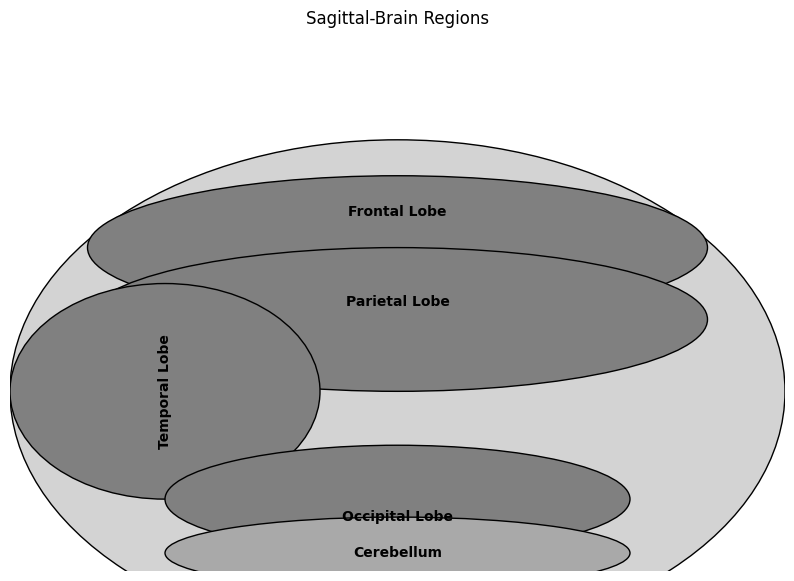

In [115]:
plotBrainRegions()

In [79]:
mainband

['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']

In [87]:
disorder_all = []
for xn_ in list(mean_disorder.index):
  nm_ = xn_[0]
  if nm_.replace(" ","_") not in disorder_all:
    disorder_all.append(nm_.replace(" ","_"))
  else:
    pass

In [88]:
disorder_all

['Addictive_disorder',
 'Anxiety_disorder',
 'Healthy_control',
 'Mood_disorder',
 'Obsessive_compulsive_disorder',
 'Schizophrenia',
 'Trauma_and_stress_related_disorder']

In [92]:
smi_all = []
for d_ in disorder_all:
  for b_ in mainband:
    globals()[f"{d_}_{b_}"] = mean_disorder.loc[d_.replace("_"," "),b_]
    smi_all.append(globals()[f"{d_}_{b_}"])

In [95]:
print(f"Total Data: {len(smi_all)}")

Total Data: 42


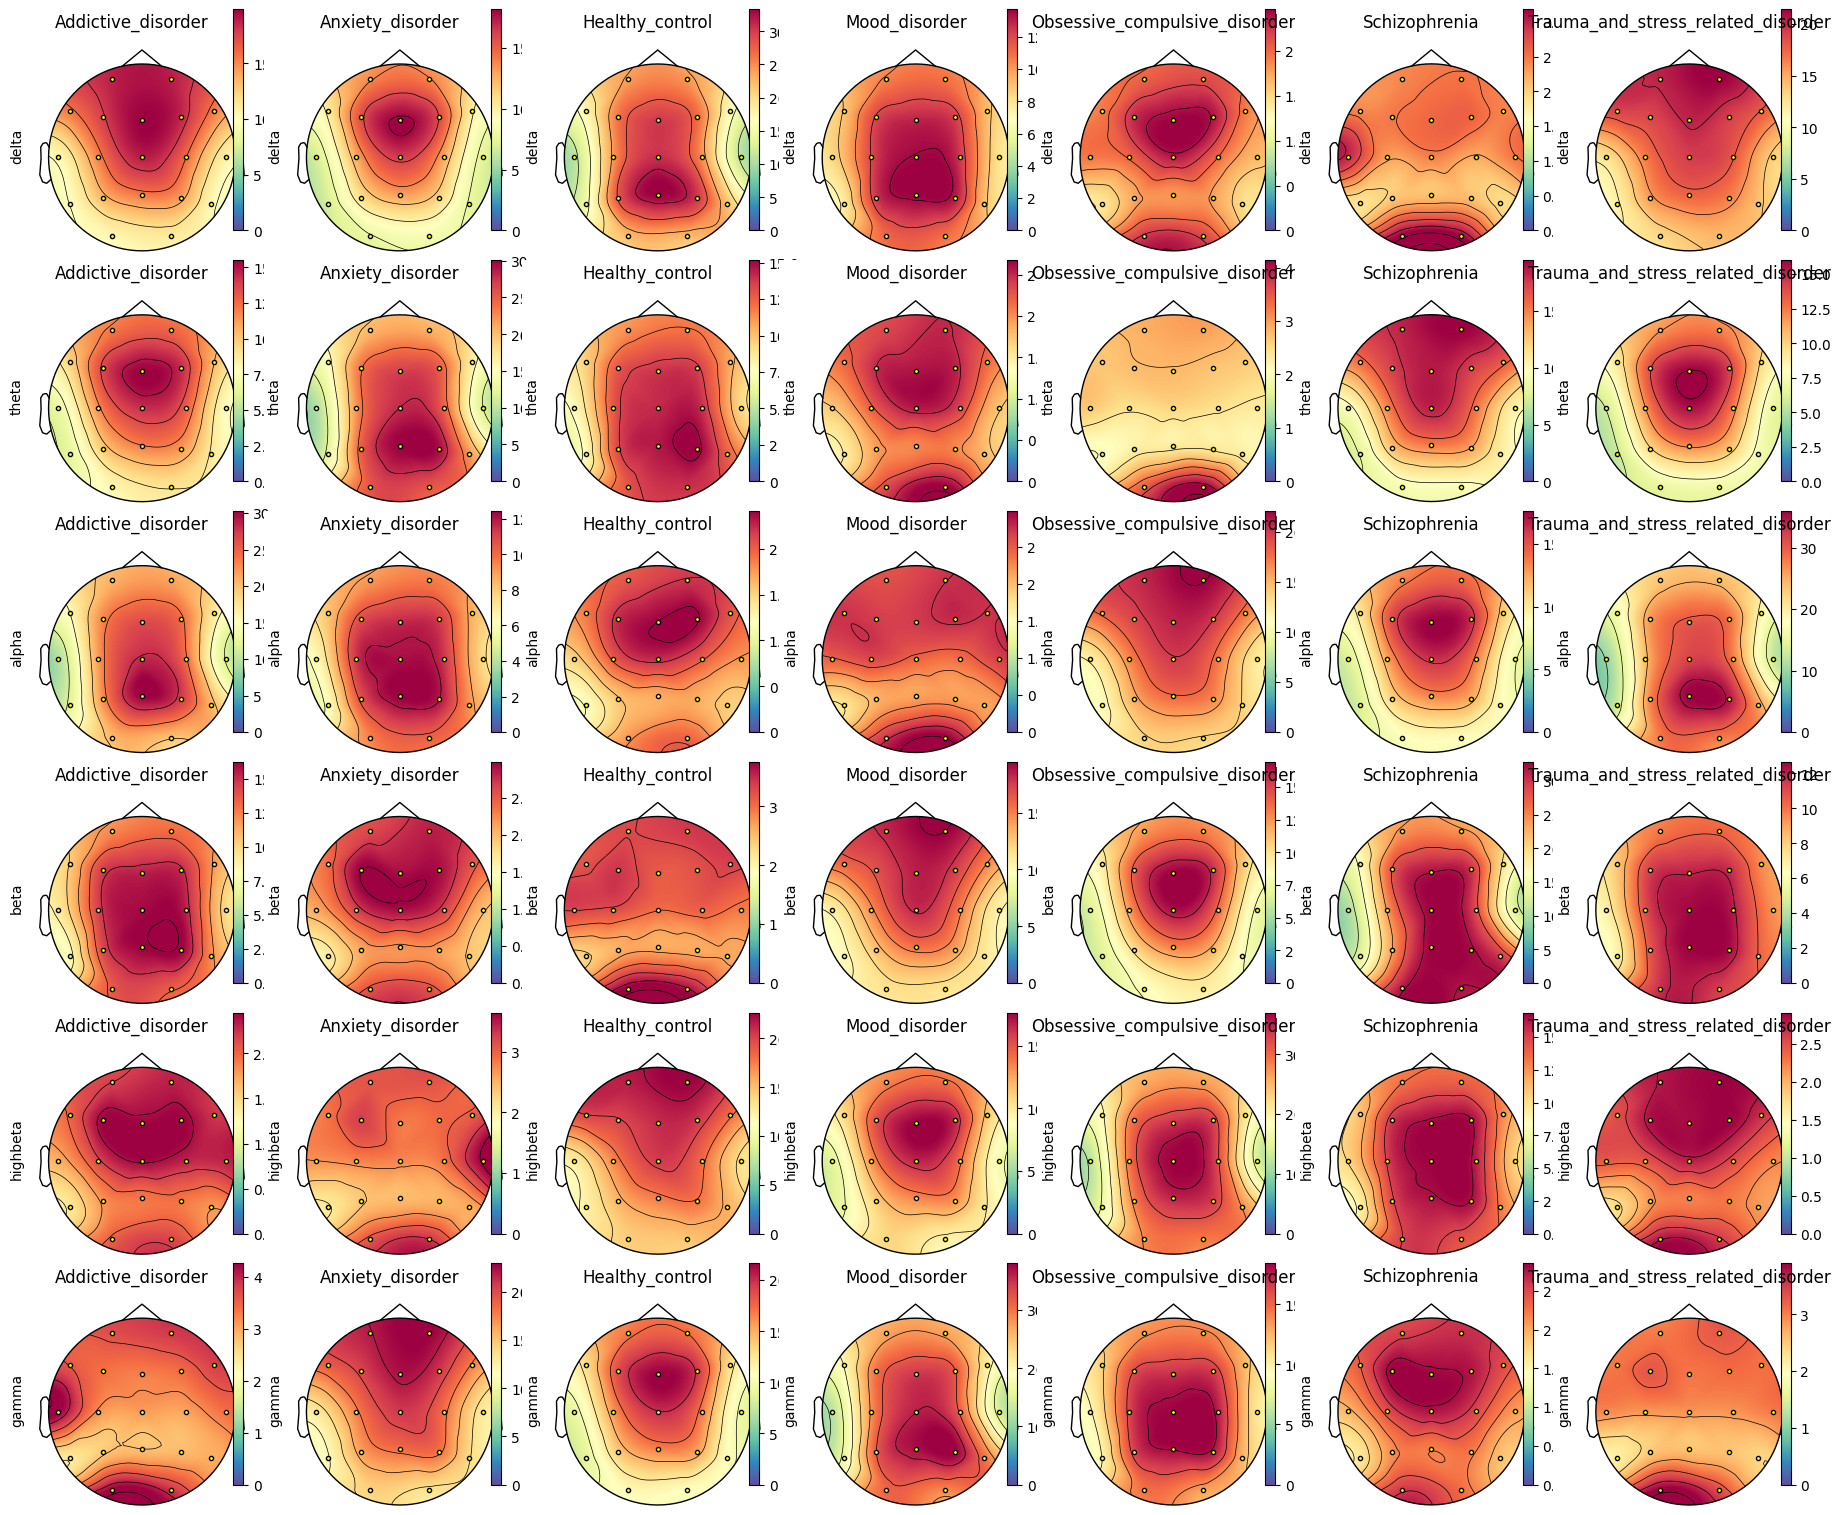

In [102]:
fg_ = plt.figure(constrained_layout=True,figsize=(18,15))
sub_ = fg_.subfigures(6,7)
for s_,t_ in zip(sub_.flatten(),smi_all):
  ax_ = s_.subplots()
  pltclass.GetPlot(t_,
                   channel_frame.to_numpy(),
                   ax_,
                   s_)
for cd_,d_ in enumerate(disorder_all):
  for cb_,b_ in enumerate(mainband):
    sub_[cb_,cd_].suptitle(disorder_all[cd_])
    sub_[cb_,cd_].axes[0].set_ylabel(mainband[cb_])
plt.show()

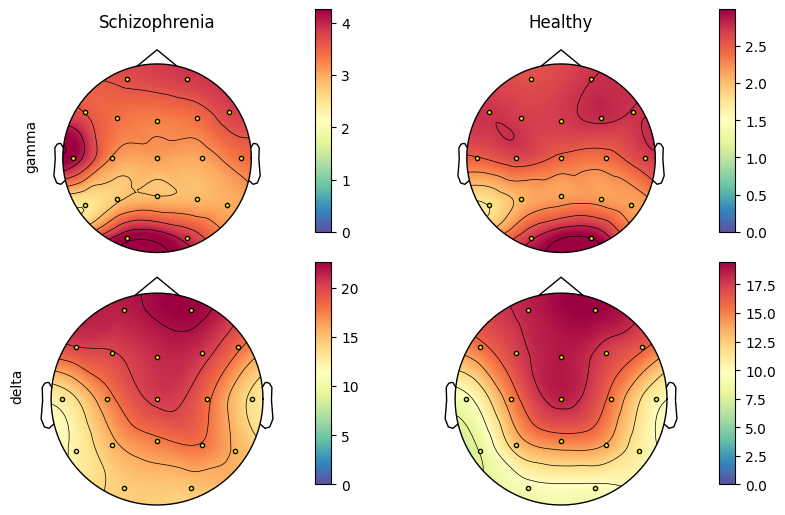

In [104]:
target_d = [Schizophrenia_gamma,
            Healthy_control_gamma,
            Schizophrenia_delta,
            Healthy_control_delta]
fg_ = plt.figure(constrained_layout=True,figsize=(8,5))
sub_ = fg_.subfigures(2,2)
for s_,t_ in zip(sub_.flatten(),target_d):
  ax_ = s_.subplots()
  pltclass.GetPlot(t_,
                   channel_frame.to_numpy(),
                   ax_,
                   s_)
sub_[0,0].suptitle("Schizophrenia")
sub_[0,0].axes[0].set_ylabel("gamma")
sub_[0,1].axes[0].set_ylabel(" ")
sub_[0,1].suptitle("Healthy")
sub_[1,0].axes[0].set_ylabel("delta")
sub_[1,1].axes[0].set_ylabel(" ")
plt.show()

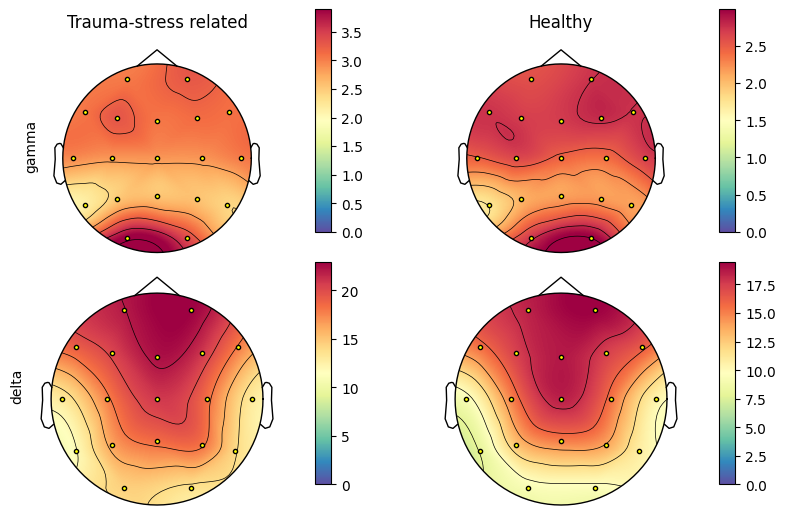

In [105]:
target_d = [Trauma_and_stress_related_disorder_gamma,
            Healthy_control_gamma,
            Trauma_and_stress_related_disorder_delta,
            Healthy_control_delta]
fg_ = plt.figure(constrained_layout=True,figsize=(8,5))
sub_ = fg_.subfigures(2,2)
for s_,t_ in zip(sub_.flatten(),target_d):
  ax_ = s_.subplots()
  pltclass.GetPlot(t_,
                   channel_frame.to_numpy(),
                   ax_,
                   s_)
sub_[0,0].suptitle("Trauma-stress related")
sub_[0,0].axes[0].set_ylabel("gamma")
sub_[0,1].axes[0].set_ylabel(" ")
sub_[0,1].suptitle("Healthy")
sub_[1,0].axes[0].set_ylabel("delta")
sub_[1,1].axes[0].set_ylabel(" ")
plt.show()

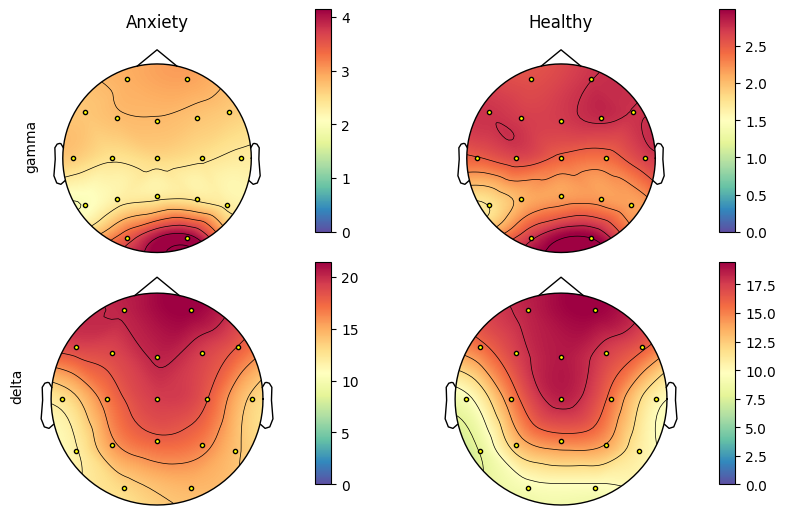

In [106]:
target_d = [Anxiety_disorder_gamma,
            Healthy_control_gamma,
            Anxiety_disorder_delta,
            Healthy_control_delta]
fg_ = plt.figure(constrained_layout=True,figsize=(8,5))
sub_ = fg_.subfigures(2,2)
for s_,t_ in zip(sub_.flatten(),target_d):
  ax_ = s_.subplots()
  pltclass.GetPlot(t_,
                   channel_frame.to_numpy(),
                   ax_,
                   s_)
sub_[0,0].suptitle("Anxiety")
sub_[0,0].axes[0].set_ylabel("gamma")
sub_[0,1].axes[0].set_ylabel(" ")
sub_[0,1].suptitle("Healthy")
sub_[1,0].axes[0].set_ylabel("delta")
sub_[1,1].axes[0].set_ylabel(" ")
plt.show()

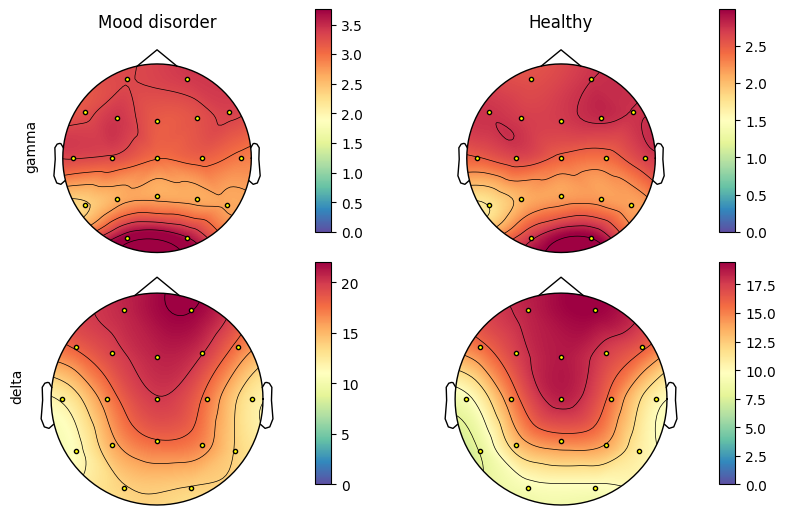

In [107]:
target_d = [Mood_disorder_gamma,
            Healthy_control_gamma,
            Mood_disorder_delta,
            Healthy_control_delta]
fg_ = plt.figure(constrained_layout=True,figsize=(8,5))
sub_ = fg_.subfigures(2,2)
for s_,t_ in zip(sub_.flatten(),target_d):
  ax_ = s_.subplots()
  pltclass.GetPlot(t_,
                   channel_frame.to_numpy(),
                   ax_,
                   s_)
sub_[0,0].suptitle("Mood disorder")
sub_[0,0].axes[0].set_ylabel("gamma")
sub_[0,1].axes[0].set_ylabel(" ")
sub_[0,1].suptitle("Healthy")
sub_[1,0].axes[0].set_ylabel("delta")
sub_[1,1].axes[0].set_ylabel(" ")
plt.show()

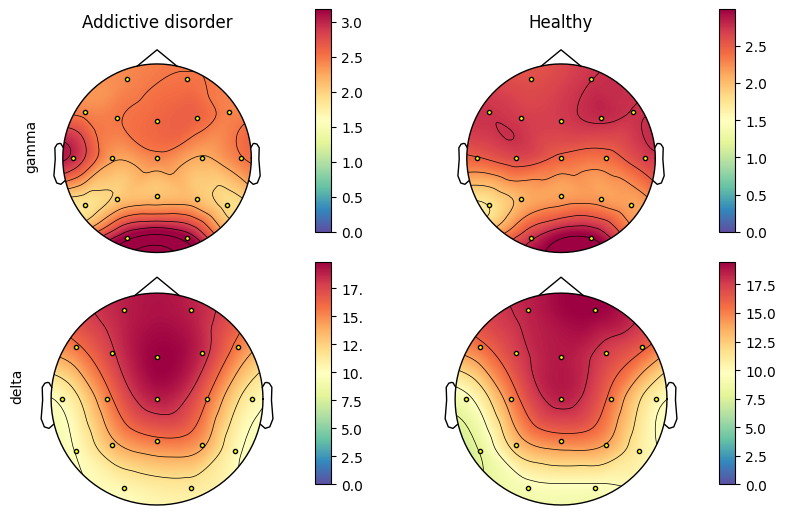

In [109]:
target_d = [Addictive_disorder_gamma,
            Healthy_control_gamma,
            Addictive_disorder_delta,
            Healthy_control_delta]
fg_ = plt.figure(constrained_layout=True,figsize=(8,5))
sub_ = fg_.subfigures(2,2)
for s_,t_ in zip(sub_.flatten(),target_d):
  ax_ = s_.subplots()
  pltclass.GetPlot(t_,
                   channel_frame.to_numpy(),
                   ax_,
                   s_)
sub_[0,0].suptitle("Addictive disorder")
sub_[0,0].axes[0].set_ylabel("gamma")
sub_[0,1].axes[0].set_ylabel(" ")
sub_[0,1].suptitle("Healthy")
sub_[1,0].axes[0].set_ylabel("delta")
sub_[1,1].axes[0].set_ylabel(" ")
plt.show()

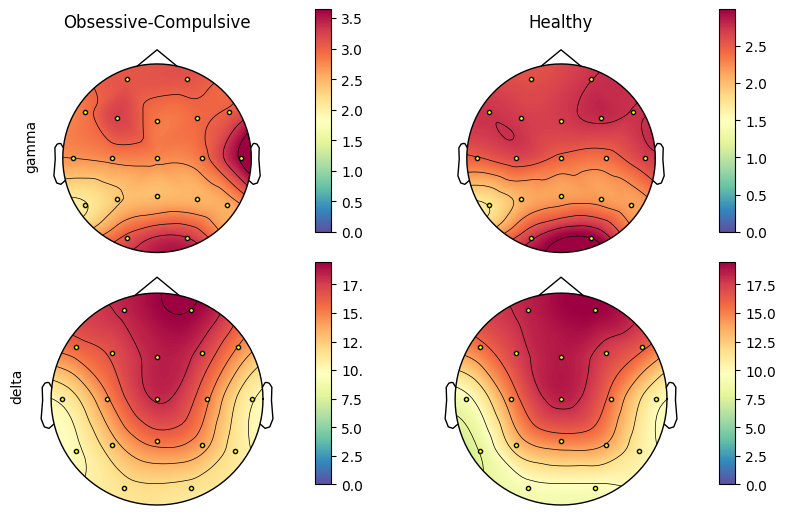

In [110]:
target_d = [Obsessive_compulsive_disorder_gamma,
            Healthy_control_gamma,
            Obsessive_compulsive_disorder_delta,
            Healthy_control_delta]
fg_ = plt.figure(constrained_layout=True,figsize=(8,5))
sub_ = fg_.subfigures(2,2)
for s_,t_ in zip(sub_.flatten(),target_d):
  ax_ = s_.subplots()
  pltclass.GetPlot(t_,
                   channel_frame.to_numpy(),
                   ax_,
                   s_)
sub_[0,0].suptitle("Obsessive-Compulsive")
sub_[0,0].axes[0].set_ylabel("gamma")
sub_[0,1].axes[0].set_ylabel(" ")
sub_[0,1].suptitle("Healthy")
sub_[1,0].axes[0].set_ylabel("delta")
sub_[1,1].axes[0].set_ylabel(" ")
plt.show()